# HCDS A2: Bias in data

Installing certain libraries to be used in this notebook

## Step 1

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Importing all libraries to be used in this analysis

In [11]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import requests 
from PIL import Image, ImageFilter
import os

%matplotlib inline

Downloading certain modules from NLTK to be used later

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**For the purpose of this analysis, I chose Wikipedia comments labeled as showing:**
**1. Aggression**
**2. Toxicity**


We first download the two datasets using the function below:

In [5]:
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
            

download_url('https://ndownloader.figshare.com/articles/4267550/versions/5', 'Aggression.zip')
zip = ZipFile('Aggression.zip')
zip.extractall('Aggression')

download_url('https://ndownloader.figshare.com/articles/4563973/versions/2', 'Toxicity.zip')
zip = ZipFile('Toxicity.zip')
zip.extractall('Toxicity')

Now we read the csv (or tsv here) files that we extracted from the archives

In [6]:
agg_df_ann = pd.read_csv("Aggression/aggression_annotations.tsv", sep='\t')
tox_df_ann = pd.read_csv("Toxicity/toxicity_annotations.tsv", sep='\t')

agg_df_com = pd.read_csv("Aggression/aggression_annotated_comments.tsv", sep='\t')
tox_df_com = pd.read_csv("Toxicity/toxicity_annotated_comments.tsv", sep='\t')

agg_df_dem = pd.read_csv("Aggression/aggression_worker_demographics.tsv", sep='\t')
tox_df_dem = pd.read_csv("Toxicity/toxicity_worker_demographics.tsv", sep='\t')

We have loaded the csv files into Pandas dataframes, and we are all set for our analysis! 

## Question 1: 
### How well does the demographic profile of the crowdworkers match that of the general population?

Let us analyse the demographic traits of the crowdworkers across multiple features. This is to discover some potential sources of bias in labeling due to varied demographics of the crowdworkers:

### Demographic analysis for Aggressive comments

In [12]:
# Define size of the figures
fig = plt.figure(figsize =(10, 7))
os.mkdir('Figures')

<Figure size 720x504 with 0 Axes>

#### Gender

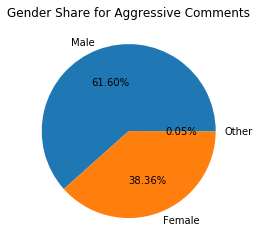

In [13]:
plt.pie(agg_df_dem['gender'].value_counts(), labels = ['Male', 'Female', 'Other'], autopct='%1.2f%%')
plt.title('Gender Share for Aggressive Comments')
plt.savefig('Figures/Gender Share for Aggressive Comments')
plt.show() 

We observe a gender imbalance in the crowdworkers, with over 60% male representation even though a general population has 50% share of males and females. This can lead to potential biases in interpretation of aggression, where certain level of aggression can be considered normal by a particular gender while it would be considered aggressive by another. Also, we see massive under-representation of 'other' gender in the crowdworkers. Thus, the annotation fails to capture what is considered aggresive only by 'other' gender.

#### Is English their first language?

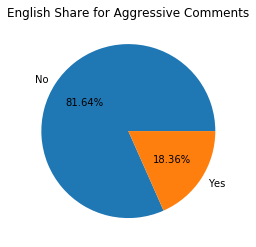

In [14]:
plt.pie(agg_df_dem['english_first_language'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%')
plt.title('English Share for Aggressive Comments')
plt.savefig('Figures/English Share for Aggressive Comments')
plt.show() 

We observe that over 80% of the crowdworkers have english as their first language. However, this is not true for the general population since only ~4% of the world population has english as their first language. Thus, the annotations fail to capture subjective aggression, i.e. comments deemed aggresive in a particular reference of language. This inculcates bias in the annotation.

#### Age

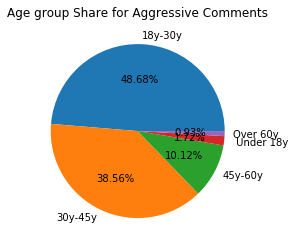

In [15]:
plt.pie(agg_df_dem['age_group'].value_counts(), labels = ['18y-30y', '30y-45y', '45y-60y', ' Under 18y', 'Over 60y'], autopct='%1.2f%%')
plt.title('Age group Share for Aggressive Comments')
plt.savefig('Figures/Age group Share for Aggressive Comments')
plt.show() 

Here, the age demographic of the crowdworkers fairly matches that of the general population. Thus, bias introduced from this ought not be a major concern. However, the age buckets are fairly wide, and we should drill down to a finer granularity and compare that with the general population.

#### Education

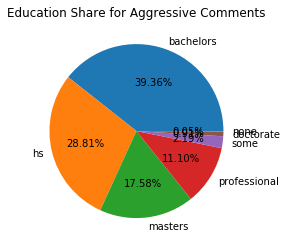

In [16]:
plt.pie(agg_df_dem['education'].value_counts(), labels = ['bachelors', 'hs', 'masters', 'professional', 'some', 'doctorate', 'none'], autopct='%1.2f%%')
plt.title('Education Share for Aggressive Comments')
plt.savefig('Figures/Education Share for Aggressive Comments')
plt.show() 

Here, about 58% of the crowdworkers have a bachelors or higher degree, which means they went to college. Thus, we observe that the crowdworkers are more on the highly educated side where as the general population is not this educated. Thus, the annotation cannot aptly capture the level of colloquialism that is prevalent among the less educated class.

### Demographic analysis for Toxic comments

#### Gender

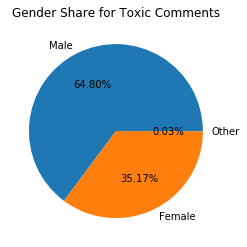

In [17]:
plt.pie(tox_df_dem['gender'].value_counts(), labels = ['Male', 'Female', 'Other'], autopct='%1.2f%%') 
plt.title('Gender Share for Toxic Comments')
plt.savefig('Figures/Gender Share for Toxic Comments')
plt.show() 

Again, we observe even a worse gender imbalance in the crowdworkers, with ~65% male representation even though a general population has 50% share of males and females. This can lead to potential biases in interpretation of toxicity, where certain level of toxicity can be considered normal by a particular gender while it would be considered toxic by another. We again see massive under-representation of 'other' gender in the crowdworkers. Thus, the annotation fails to capture what is considered toxic only to 'other' gender.

#### Is English their first language?

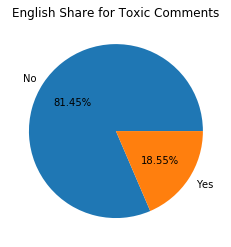

In [18]:
plt.pie(tox_df_dem['english_first_language'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%') 
plt.title('English Share for Toxic Comments')
plt.savefig('Figures/English Share for Toxic Comments')
plt.show() 

Again, we observe that over 80% of the crowdworkers have english as their first language. However, this is not true for the general population since only ~4% of the world population has english as their first language. Thus, the annotations fail to capture subjective toxicity, i.e. comments deemed toxic only in a particular reference of language. This inculcates bias in the annotation.

#### Age

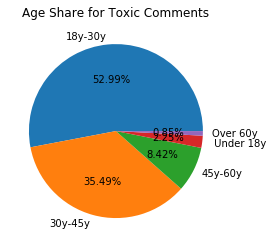

In [19]:
plt.pie(tox_df_dem['age_group'].value_counts(), labels = ['18y-30y', '30y-45y', '45y-60y', ' Under 18y', 'Over 60y'], autopct='%1.2f%%')
plt.title('Age Share for Toxic Comments')
plt.savefig('Figures/Age Share for Toxic Comments')
plt.show() 

Similar to aggression, we see that the age demographic of the Toxicity annotation crowdworkers fairly matches that of the general population. Thus, bias introduced from this ought not be a major concern. However, the age buckets are fairly wide, and we should drill down to a finer granularity and compare that with the general population.

#### Education

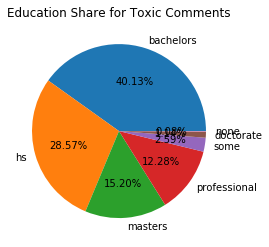

In [20]:
plt.pie(tox_df_dem['education'].value_counts(), labels = ['bachelors', 'hs', 'masters', 'professional', 'some', 'doctorate', 'none'], autopct='%1.2f%%')
plt.title('Education Share for Toxic Comments')
plt.savefig('Figures/Education Share for Toxic Comments')
plt.show() 

Here, again about 57% of the crowdworkers have a bachelors or higher degree, which means they went to college. Thus, we observe that the toxicity annotation crowdworkers are more on the highly educated side where as the general population is not this educated. Thus, the annotation cannot aptly capture the level of colloquialism that is prevalent among the less educated class.

### **Conclusion:**
We observe similar demographic profiles of crowdworkers who annotated Aggressive comments and those who annotated Toxic comments. 

For both datasets, we see an under-representation of females and 'other' gender among the crowdworkers. Thus a model tarined on this dataset annotated by skewed labeller demographic distribution would not be able to properly capture hate speech subjective to women and 'other' gender.

For both datasets, the most of the crowdworkers had english as their first language while most of the world population does not. Thus, a model trained on these datasets would not be able to capture hate speech from the perspective of a non-native English speaker.

For both datasets, the labeller demographic distribution was more skewed towards the highly educated side while the general population is not. Thus, a model trained on these datasets would not be able to capture hate speech in typical slangs with some degree of colloquialism.

On the brighter side, the labeller demographic distribution according to age complies well with general population, and we need to drill down to uncover bias here.


## Question 2: 
### Are certain words more likely to be associated with comments labelled as aggressive speech and toxic speech? 

Let us analyse the most common words in aggressive and toxic comments and compare them with comments without toxicity/aggression. This is to learn how well the Aggressive/Toxic labeled comments reflect hostile speech in online as well as offline discussions outside of Wikipedia.

In [21]:
# Joining the comments dataset with annotated dataset for both toxicity and aggression datasets 
tox_df_all = tox_df_com.merge(tox_df_ann, on='rev_id')
agg_df_all = agg_df_com.merge(agg_df_ann, on='rev_id')

# Creating a set of stopwords to remove from the comments
stop_words = set(stopwords.words('english')) 

In [22]:
tox_df_all.to_csv("Toxic_Comments_annotated.csv")
agg_df_all.to_csv("Aggressive_Comments_annotated.csv")

I chose to create a wordcloud visual to analyze the frequent words in hate speech

### Word Cloud analysis for Toxic Speech

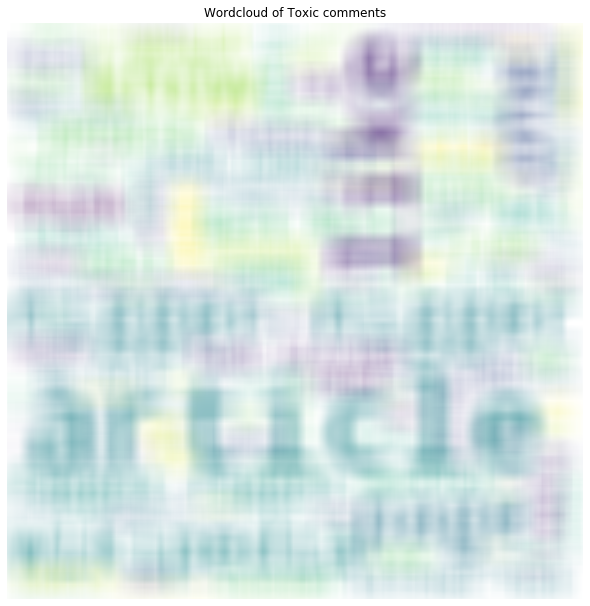

In [26]:
# Create a shuffled dataframe with only those rows that were labelled toxic
tox_comm = tox_df_all[tox_df_all['toxicity'] == 1]['comment'].sample(frac = 1) 

# Combining all toxic comments into a single piece of text
# We consider only 10000 random toxic comments to create the wordcloud due to computational constraints 
all_comm_tox = ''
for i in range(10000): 
    all_comm_tox += str(tox_comm.iloc[i])

# Remove the meaningless string 'NEWLINE_TOKEN' from the comments
all_comm_tox = all_comm_tox.replace('NEWLINE_TOKEN', '')

# Creating the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_tox) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wordcloud of Toxic comments')
plt.savefig('Figures/Wordcloud of Toxic comments')

# The code below blurs the image due to explicit content. Feel free to comment it out to see original figure
oriImage = Image.open(r'Figures/Wordcloud of Toxic comments.png')
blurImage = oriImage.filter(ImageFilter.BoxBlur(15))
blurImage.save('Figures/Wordcloud of Toxic comments.png')

img = mpimg.imread(r'Figures/Wordcloud of Toxic comments.png')
plt.imshow(img)

We see that the frequent words seen in the above wordcloud are representative of words that I would associate with toxic speech. These frequently labelled words are a good representation of toxic speech in online discussions outside of Wikipedia as well, like Tweets and Facebook posts. These are used in offline discussions as well in toxic speech.

### Word Cloud analysis for non-Toxic Speech

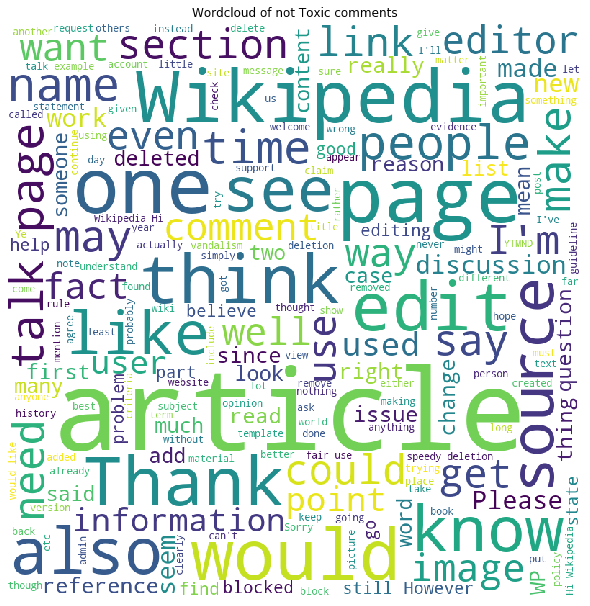

In [27]:
# Create a shuffled dataframe with only those rows that were labelled as not toxic
ntox_comm = tox_df_all[tox_df_all['toxicity'] == 0]['comment'].sample(frac = 1) 

# Combining all non toxic comments into a single piece of text
# We consider only 10000 random non toxic comments to create the wordcloud due to computational constraints 
all_comm_ntox = ''
for i in range(10000):
    all_comm_ntox += str(ntox_comm.iloc[i])

# Remove the meaningless string 'NEWLINE_TOKEN' from the comments
all_comm_ntox = all_comm_ntox.replace('NEWLINE_TOKEN', '')

# Creating the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_ntox) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wordcloud of not Toxic comments')
plt.savefig('Figures/Wordcloud of not Toxic comments')
plt.show() 

We see that the frequent words are all trivial and belong to any casual conversation online or offline. There is no sign of toxicity here, as expected.

### Word Cloud analysis for Aggressive Speech

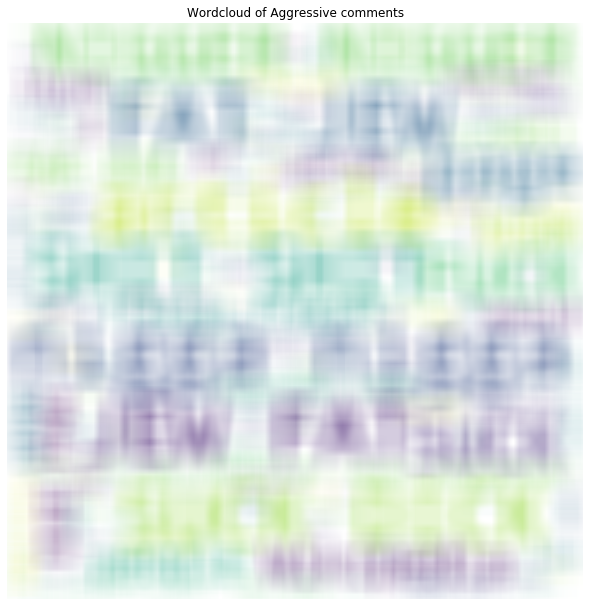

In [28]:
# Create a shuffled dataframe with only those rows that were labelled as aggressive
agg_comm = agg_df_all[agg_df_all['aggression'] == 1]['comment'].sample(frac = 1) 

# Combining all aggressive comments into a single piece of text
# We consider only 10000 random aggressive comments to create the wordcloud due to computational constraints 
all_comm_agg = ''
for i in range(10000):
    all_comm_agg += str(agg_comm.iloc[i])

# Remove the meaningless string 'NEWLINE_TOKEN' from the comments
all_comm_agg = all_comm_agg.replace('NEWLINE_TOKEN', '')

# Creating the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_agg) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wordcloud of Aggressive comments')
plt.savefig('Figures/Wordcloud of Aggressive comments')
# plt.show() 

# The code below blurs the image due to explicit content. Feel free to comment it out to see original figure
oriImage = Image.open(r'Figures/Wordcloud of Aggressive comments.png')
blurImage = oriImage.filter(ImageFilter.BoxBlur(15))
blurImage.save('Figures/Wordcloud of Aggressive comments.png')

img = mpimg.imread(r'Figures/Wordcloud of Aggressive comments.png')
plt.imshow(img)

We see that the frequent words seen in the above wordcloud are representative of words that I would associate with aggressive speech. These frequently labelled words are a good representation of aggressive speech in online discussions outside of Wikipedia as well, like Tweets and Facebook posts. These are used in offline discussions as well in aggressive speech.

### Word Cloud analysis for non-Aggressive Speech

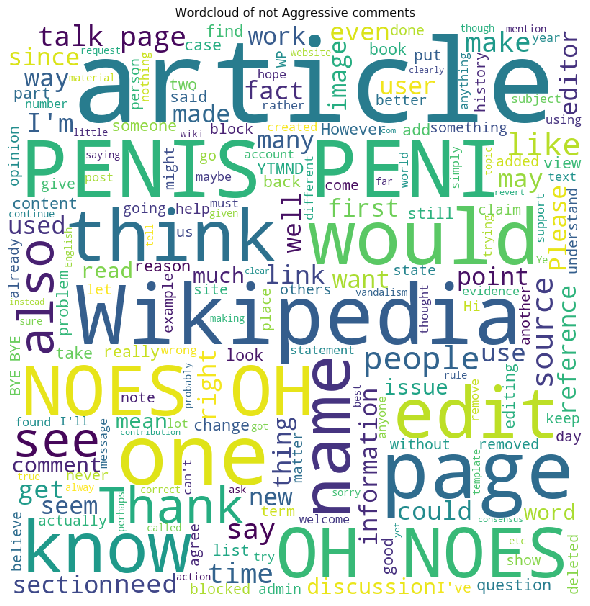

In [29]:
# Create a shuffled dataframe with only those rows that were labelled as not aggressive
nagg_comm = agg_df_all[agg_df_all['aggression'] == 0]['comment'].sample(frac = 1)

# Combining all not aggressive comments into a single piece of text
# We consider only 10000 random not aggressive comments to create the wordcloud due to computational constraints 
all_comm_nagg = ''
for i in range(10000):
    all_comm_nagg += str(nagg_comm.iloc[i])

# Remove the meaningless string 'NEWLINE_TOKEN' from the comments
all_comm_nagg = all_comm_nagg.replace('NEWLINE_TOKEN', '')

# Creating the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_nagg) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wordcloud of not Aggressive comments')
plt.savefig('Figures/Wordcloud of not Aggressive comments')
plt.show() 

We see that the frequent words are all trivial and belong to any casual conversation online or offline. There is no sign of aggression here, as expected.

## Step 2

**Q1.** What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 

**A1:** Since Perspective API models have been trained on an English corpus labeled by English crowdworkers, this API would not be able to accurately detect hostile speech written in some other language using English script. Also, the demographics of the crowdworkers can never represent all of the diversity in the population. Thus, speeches deemed hostile in certain cultures/demographics that the crowdworkers do not include will not be labeled accurately, and thus will not be detected by Perspective API.

------------------------------------------------------------------------------------

**Q2:** What are some other contexts or applications where you would expect the Perspective API to perform particularly well, or particularly poorly? Why?

**A2:** Perspective API has been trained on comments from English Wikipedia talk pages. However, only a small segment of the society visits English Wikipedia talk pages. Thus, the kind/type of hostility that is seen on ths comments from English Wikipedia talk pages is very specific and the trained model would be well aversed with that only. If this model is used on online portals with a very different target audience, like say fandom pages, then Perspective API will tend to perform poorly. On the other hand, it will perform really well on other online encyclopedia platforms.

------------------------------------------------------------------------------------

**Q3:** Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?


**A3:** We observed from the analysis that most of the bias in the came from the demographic variations in the crowdworkers. To improve the model, I would create a standardized set of rules of labeling for crowdworkers. This way, we can be able to mitigate the variation in the labeling patterns due to the demographics distribution of the crowdworkers, and we get standard labeling. This will also help with reproducibility of the data curation process.

------------------------------------------------------------------------------------

### Thank You!

-----------------------------